In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# A little setting to make our plots look nicer
sns.set_style("whitegrid")

In [7]:
url='https://raw.githubusercontent.com/ashaabrizvi/FIFA-20/refs/heads/master/players_20.csv'
df = pd.read_csv(url)

In [8]:
print("Here's a peek at the data:")
print(df[['short_name', 'age', 'height_cm', 'weight_kg', 'overall', 'potential', 'attacking_finishing', 'skill_dribbling']].head())

Here's a peek at the data:
          short_name  age  height_cm  weight_kg  overall  potential  \
0           L. Messi   32        170         72       94         94   
1  Cristiano Ronaldo   34        187         83       93         93   
2          Neymar Jr   27        175         68       92         92   
3           J. Oblak   26        188         87       91         93   
4          E. Hazard   28        175         74       91         91   

   attacking_finishing  skill_dribbling  
0                   95               97  
1                   94               89  
2                   87               96  
3                   11               12  
4                   84               95  


In [9]:
features = ['attacking_finishing', 'skill_dribbling', 'shooting', 'passing', 'dribbling']
target = 'overall'

In [10]:
player_stats = df[features + [target]].dropna().copy()


How do skills relate to the Overall rating?


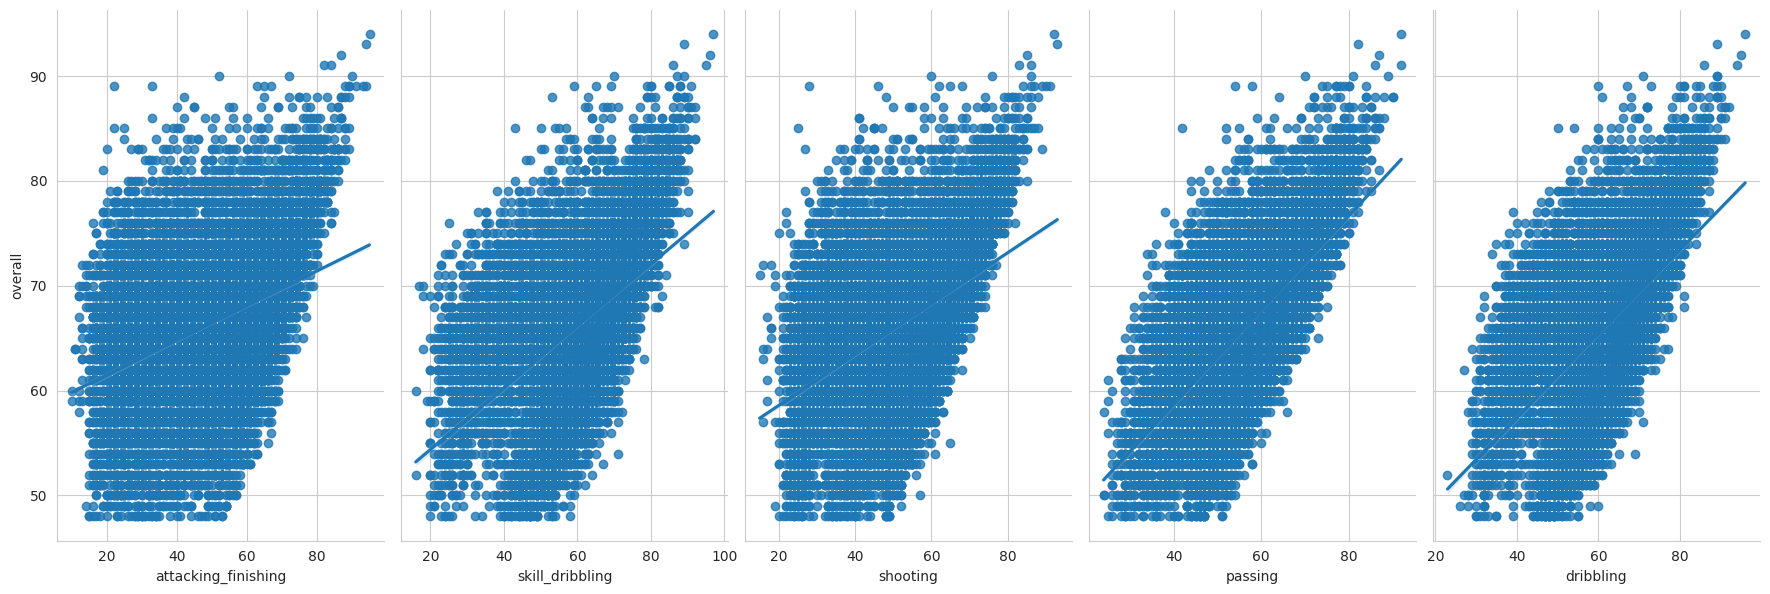

In [16]:
print("\nHow do skills relate to the Overall rating?")
sns.pairplot(player_stats, x_vars=features, y_vars=target, height=6, aspect=0.6, kind='reg')
plt.show()

In [17]:
X = player_stats[features]
y = player_stats[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel has been trained!")


Model has been trained!


In [20]:

predictions = model.predict(X_test)


print("\nFirst 5 Predictions vs. Actual Ratings:")
for i in range(5):
    print(f"Predicted: {predictions[i]:.2f}, Actual: {y_test.iloc[i]}")


mse = mean_squared_error(y_test, predictions)
print(f"\nOverall 'Mean Squared Error': {mse:.2f}")


First 5 Predictions vs. Actual Ratings:
Predicted: 67.31, Actual: 66
Predicted: 61.37, Actual: 62
Predicted: 74.47, Actual: 77
Predicted: 67.10, Actual: 67
Predicted: 72.91, Actual: 74

Overall 'Mean Squared Error': 21.62


In [22]:

messi_stats = df[df['short_name'] == 'L. Messi'][features]


messi_prediction = model.predict(messi_stats)
actual_messi_rating = df[df['short_name'] == 'L. Messi']['overall'].values[0]

print(f"\nModel predicts Messi's rating is: {messi_prediction[0]:.2f}")
print(f"His actual rating is: {actual_messi_rating}")


Model predicts Messi's rating is: 83.02
His actual rating is: 94
